# Machine Learning - Agrupamento/Cluterização

O agrupamento ou clusterização é um tipo de aprendizado de máquina não supervisionado, que como o próprio nome sugere é responsável por separar os dados de uma análise em diferentes grupos da melhor maneira possível.

## Método K-Means

Funcionamento:

    1 - Primeiro, preciso definir um ‘K’, ou seja, um número de clusters (ou agrupamentos).
    2 - Depois, preciso definir, aleatoriamente, um centroide para cada cluster.
    3 - O próximo passo é calcular, para cada ponto, o centroide de menor distância. Cada ponto pertencerá ao centroide mais próximo (lembrar do exemplo do CD logístico e das lojas: cada loja (ponto) deve ser atendida pelo CD (centróide) mais próximo)
    4 - Agora, devo reposicionar o centróide. A nova posição do centroide deve ser a média da posição de todos os pontos do cluster.
    5 - Os dois ultimos passos são repetidos, iterativamente, até obtermos a posição ideal dos centróides.

<img src="kmeans.jpg" style=width:500px;height:400px/>

## Exemplo 1

### Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

### Criação dos dados

In [2]:
# Criando dados usando a função make blobs (Parametros são: n° de amostras, n° de características, n° de centros,
# espalhamento dos dados, e embaralhamento dos dados)

data, labels = make_blobs(n_samples=400, n_features=2, centers=3, cluster_std=0.5, shuffle=True)
print(data)

[[ 9.51735592  1.27466542]
 [-8.0506792  -7.09159966]
 [ 9.14031395  1.3185636 ]
 [ 9.32139617  1.25286214]
 [-8.11238667 -8.46286093]
 [-8.48053347 -8.53093751]
 [-0.89078079  6.2801861 ]
 [-8.82341752 -8.05887099]
 [ 9.87582698  1.54888411]
 [-8.11068821 -8.1663298 ]
 [ 8.29043691  0.87168295]
 [ 8.50413226  0.69850846]
 [-1.45663825  6.45331655]
 [-1.7556009   7.78251568]
 [ 9.84099485  1.36761693]
 [ 7.6463891   1.89143414]
 [ 8.2136766   1.23078465]
 [-7.61879131 -8.08377464]
 [-7.99164425 -6.89959341]
 [-1.55955812  7.34663199]
 [ 7.87763337  1.39329031]
 [ 8.22708735  0.87741068]
 [ 8.97022005  1.85510851]
 [-0.76423463  6.52188899]
 [-8.46554776 -7.73121537]
 [-1.08194192  7.45369766]
 [-1.67541951  7.49499643]
 [-0.71095848  7.27382714]
 [-1.0965298   6.75295482]
 [ 8.89336341  0.76583891]
 [-1.61353449  6.55777498]
 [-8.29445147 -7.88618746]
 [-0.63966198  6.32750232]
 [-1.56175229  6.49156422]
 [ 8.81526489  0.90660694]
 [-8.54911837 -7.98674865]
 [-1.92953091  7.68148217]
 

### Análise exploratória

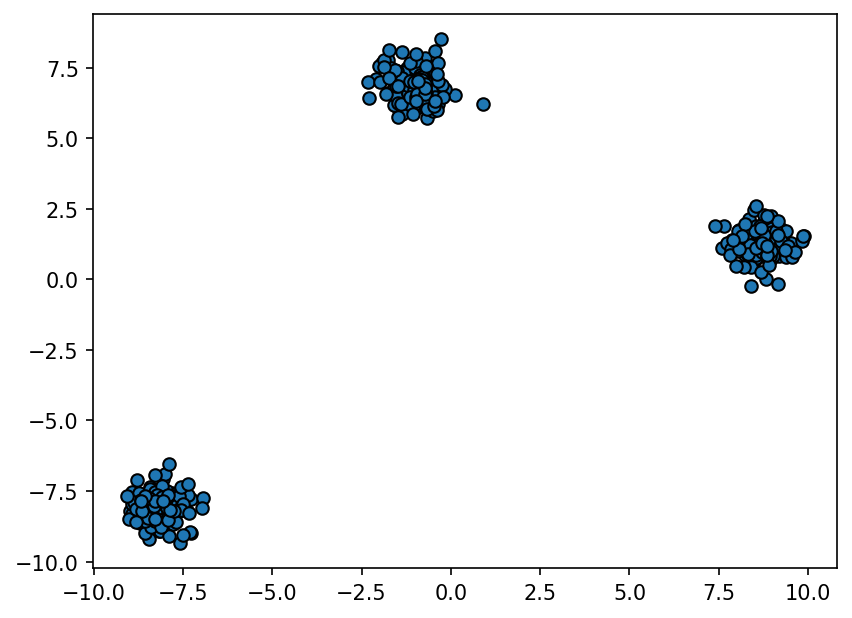

In [3]:
plt.rcParams['figure.dpi'] = 150
plt.scatter(data[:, 0], data[:, 1], marker="o", edgecolors="black")
plt.show()

### Criação do KMeans

In [4]:
# Instanciando um modelo KMeans e passando os dados gerados para treinamento
modelo = KMeans(n_clusters=3)
modelo.fit(data)

C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

### Predição

In [5]:
# Prevendo os valores dos dados
resposta = modelo.predict(data)


# Separando os grupos de acordo com o que o modelo previu
grupo_1 = data[resposta == 0]
grupo_2 = data[resposta == 1]
grupo_3 = data[resposta == 2]
centros = modelo.cluster_centers_

### Plotando o gráfico

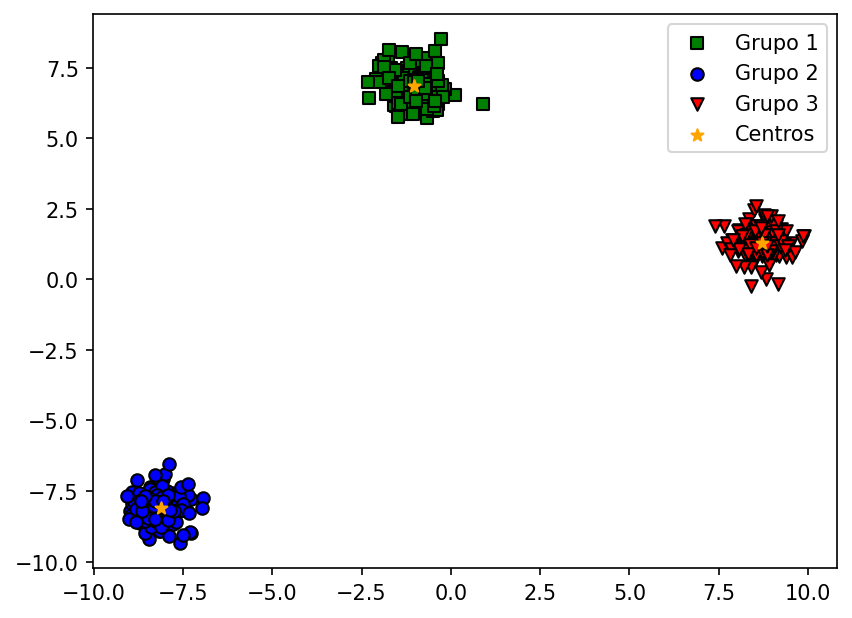

In [6]:
plt.scatter(grupo_1[:, 0], grupo_1[:, 1], c="green", marker="s", label="Grupo 1", edgecolors="black")
plt.scatter(grupo_2[:, 0], grupo_2[:, 1], c="blue", marker="o", label="Grupo 2", edgecolors="black")
plt.scatter(grupo_3[:, 0], grupo_3[:, 1], c="red", marker="v", label="Grupo 3", edgecolors="black")
plt.scatter(centros[:, 0], centros[:, 1], c="orange", label="Centros", marker="*")

plt.legend(scatterpoints=1)

plt.show()

### Avaliações

### Índice Calinski Harabasz

O índice CH (também conhecido como critério de razão de variância ) é uma medida de quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). Aqui, a coesão é estimada com base nas distâncias dos pontos de dados em um cluster ao seu centróide do cluster e a separação é baseada na distância dos centróides do cluster do centróide global. (Quanto maior o valor, melhor foi a divisão).

### Silhouette Score

Varia entre -1 e 1 de nos mostra o quão bem os elementos estão agrupados levando em conta algumas definições matemáticas. (Quanto mais próximo de 1, melhor foi a divisão).

In [7]:
# Avaliando o modelo dentro dos dois métodos de avaliação, passando os dados e os labels obtidos no treinamento como parametro
print("CH:", calinski_harabasz_score(data, modelo.labels_))
print("SC:", silhouette_score(data, modelo.labels_))

CH: 35002.5979232262
SC: 0.9299032381644252


## Exemplo 2

### Importando os dados

In [8]:
# Importando o csv
data2 = pd.read_csv("clustering_data.csv", sep=";")
data2.head()

,f1,f2
0,0.018637,8.964998
1,-5.737664,-1.860687
2,-4.195087,-4.641740
3,8.021220,-4.016667
4,-1.403076,5.093363


### Análise exploratória

### Verificando a presença de elementos nulos e excluindo-os

In [9]:
print("Total de dados:", len(data2)) #Mostrando o total de dados
display(data2.isna().any()) #Verificando a presença de dados nulos
data2 = data2.dropna() #Excluindo os dados nulos
print("Total de dados:", len(data2)) #Mostrando o total de dados novamente

Total de dados: 2297


f1    True
f2    True
dtype: bool

Total de dados: 1703


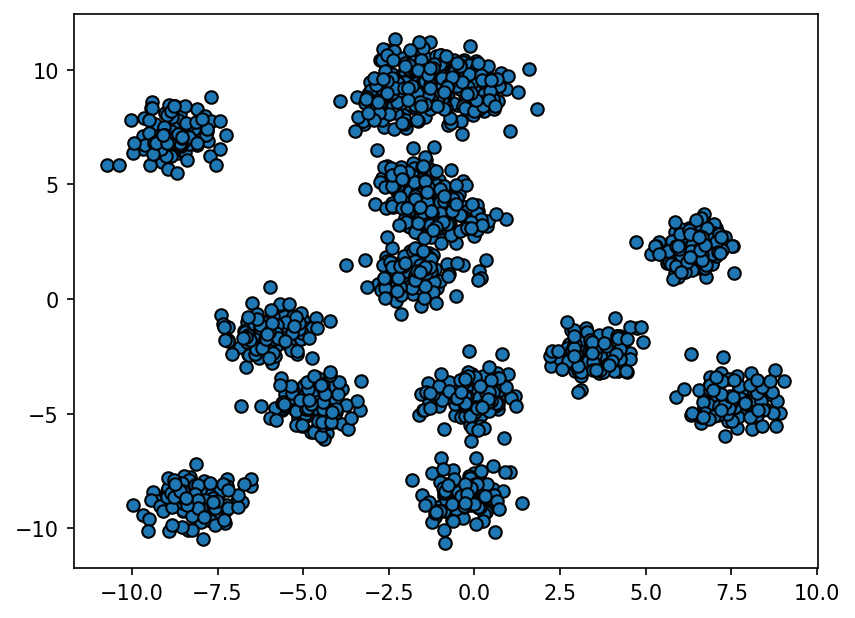

In [10]:
plt.rcParams['figure.dpi'] = 150
plt.scatter(data2["f1"], data2["f2"], marker="o", edgecolor="black")
plt.show()

### Elbow Method

Método onde treinamos nosso modelo com diferentes números de clusters possíveis e posteriormente analisamos qual o número ideal. Número esse que é definido pelo ponto onde a reta do gráfico começa a se tornar constante.

In [11]:
# Todos dados são para treino
# Transformando em array do numpy
x = np.array(data2)
print(x)

[[ 0.01863667  8.96499819]
 [-5.737664   -1.86068695]
 [-4.19508688 -4.6417399 ]
 ...
 [-7.30031466 -9.62081282]
 [-0.54031681  4.13978919]
 [-1.38781658  4.66333865]]


In [12]:
# Testando a diferentes números possíveis de clusters entre 1 e 20, avaliando-os, e salvando as avaliações em uma lista
distortions = []
for i in range(1, 21):
    km = KMeans(n_clusters=i)
    km.fit(x)
    metrica = km.inertia_
    distortions.append(metrica)

C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

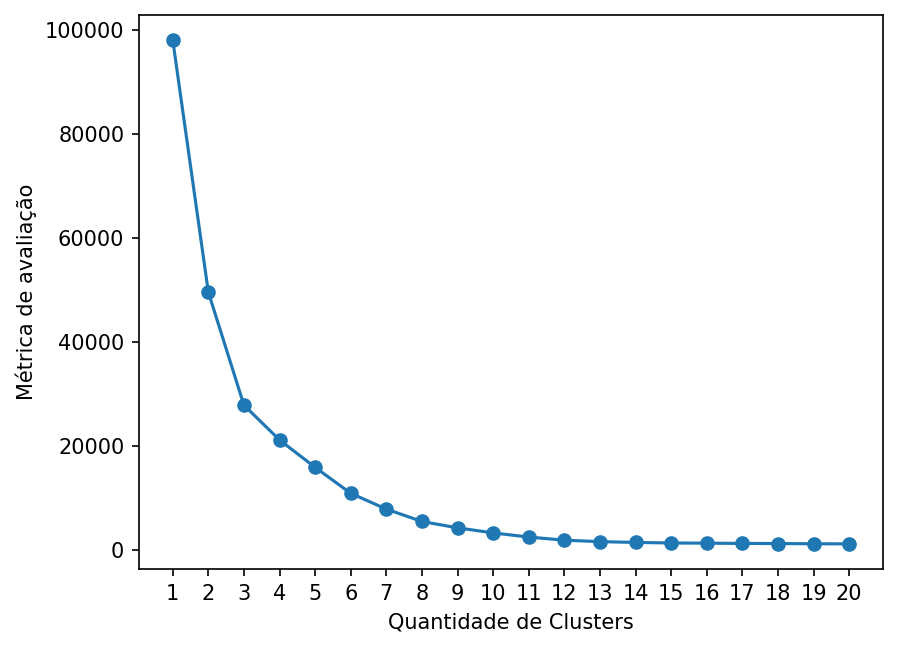

In [13]:
# Plotando o gráfico
plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel("Quantidade de Clusters")
plt.ylabel("Métrica de avaliação")
plt.xticks(range(1, 21))
plt.show()

### Criando o KMeans

In [14]:
# Instanciando o modelo
modelo2 = KMeans(n_clusters=13)
modelo2.fit(x)

C:\Users\Willy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=13)

### Predição

In [15]:
# Prevendo os valores
resposta2 = modelo2.predict(x)

### Mostrando Gráfico

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

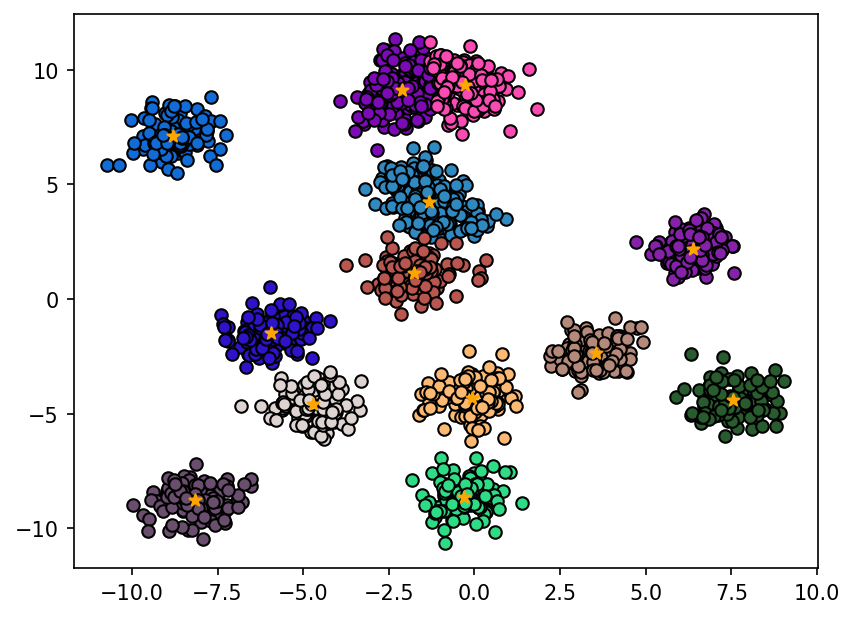

In [16]:
centros2 = modelo2.cluster_centers_

for i in range(13):
    grupo_i = x[resposta2 == i]
    plt.scatter(grupo_i[:,0] ,grupo_i[:,1], c=np.random.rand(3), edgecolors=("black") )
    
plt.scatter(centros2[:, 0], centros2[:, 1], c="orange", label="Centros", marker="*")
plt.show()

In [17]:
# Avaliando o modelo dentro dos dois métodos de avaliação, passando os dados e os labels obtidos no treinamento como parametro
print("CH:", calinski_harabasz_score(data2, modelo2.labels_))
print("SC:", silhouette_score(data2, modelo2.labels_))

CH: 8736.251860544251
SC: 0.6342922204056413
